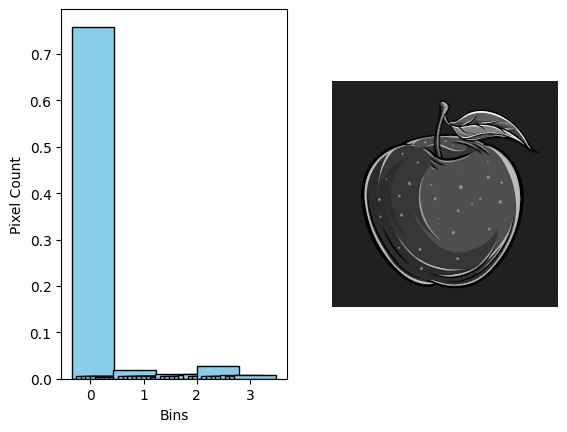

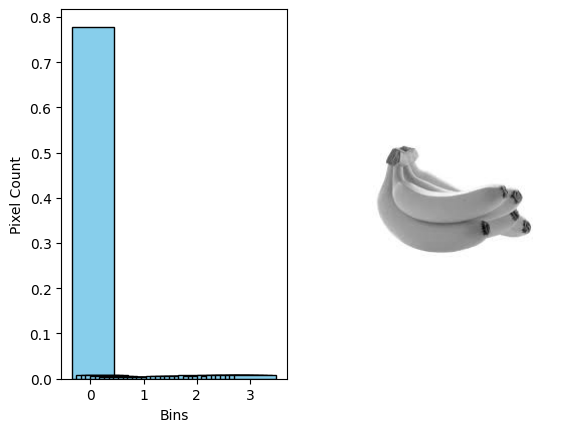

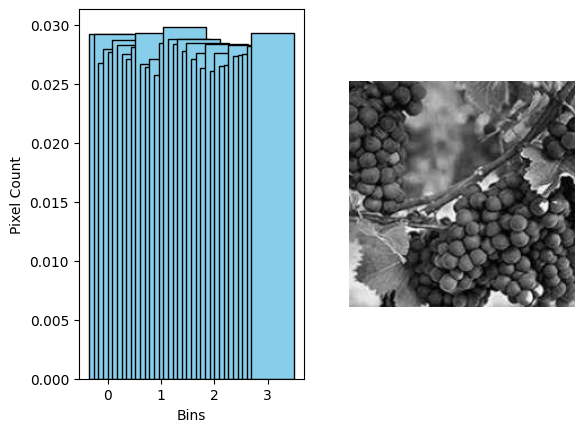

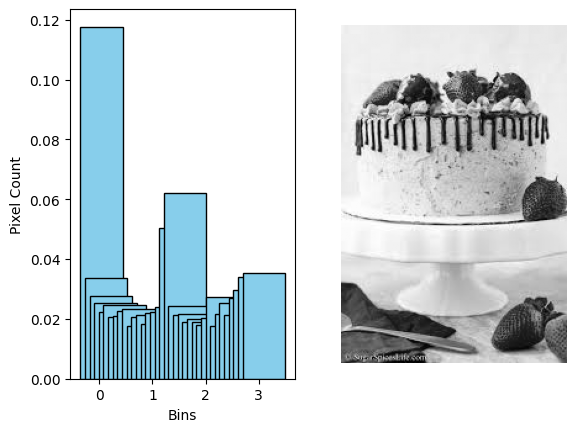

euclidean distance [[0.74047102]] manhattan distance [[1.45934815]] cosine distance [[0.77252496]]


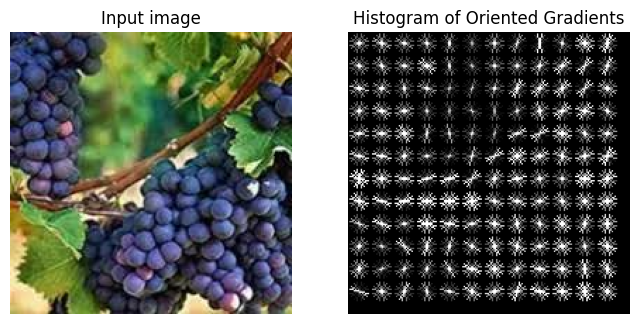

Apples Shape (200,)
Bananas Shape (200,)
Grapes Shape (200,)
Strawberries Shape (200,)
Prior shape (800, 36)
New shape (800, 2)


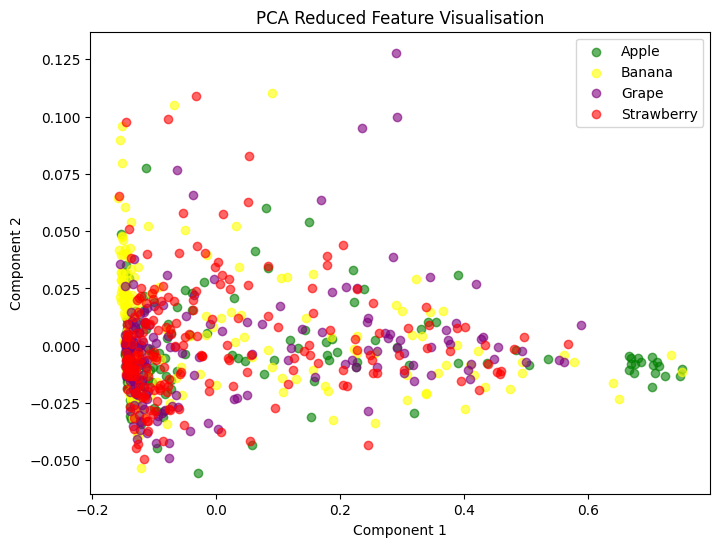

(3000, 9555)
(3000, 9555)


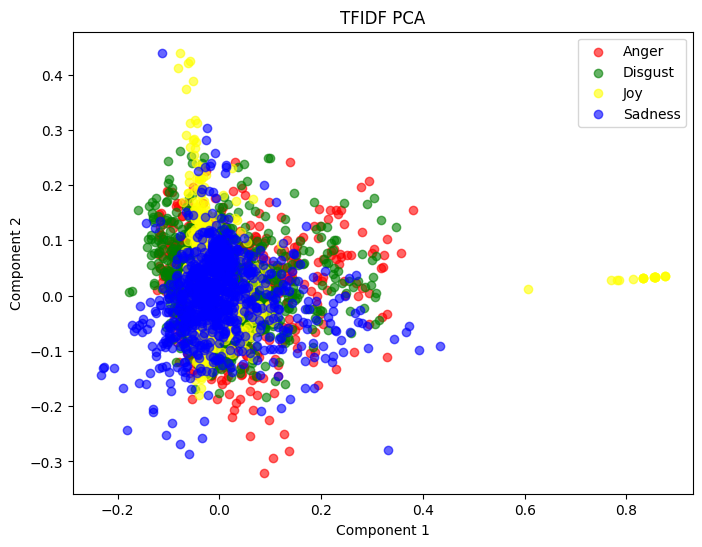

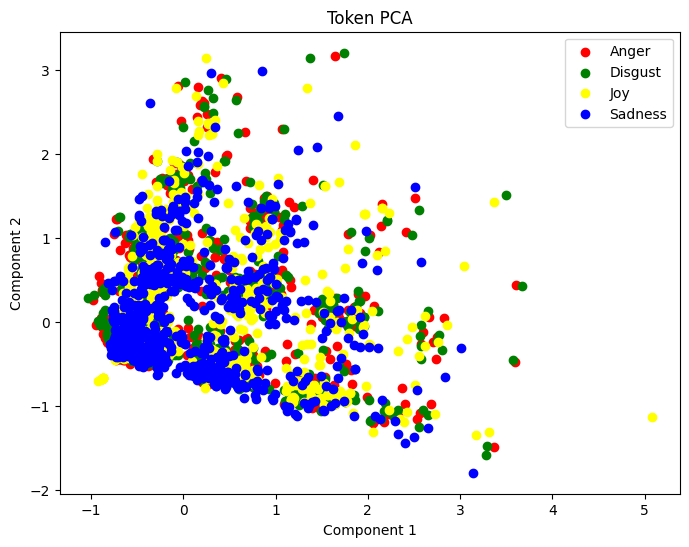

In [37]:
import skimage 
from skimage import io 
import os 
from natsort import natsorted, ns 
import matplotlib.pyplot as plt 
from skimage import data 
from skimage.color import rgb2gray 
import numpy as np 
from skimage import filters 
import sklearn
from skimage.feature import hog
from skimage import data, exposure
import glob
from sklearn.decomposition import PCA
import json
import pandas as pd

def angle(dx, dy): 
    """Calculate the angles between horizontal and vertical operators.""" 
    return np.mod(np.arctan2(dy, dx), np.pi) 



#There must be a better way to do this, but I don't know how.
os.chdir("C:/Users/eleph/OneDrive/Documents/College Work/datamining/Fruits Classification/test/Apple") 
apple_image = io.imread("Apple (12).png") 
os.chdir("C:/Users/eleph/OneDrive/Documents/College Work/datamining/Fruits Classification/test/Banana") 
banana_image = io.imread("Banana (2044).jpeg") 
os.chdir("C:/Users/eleph/OneDrive/Documents/College Work/datamining/Fruits Classification/test/Grape") 
grape_image = io.imread("Grape (54).jpeg") 
os.chdir("C:/Users/eleph/OneDrive/Documents/College Work/datamining/Fruits Classification/test/Strawberry") 
strawberry_image = io.imread("Strawberry (122).jpeg") 

#Converting rgb images to grayscale
grayscale_apple = rgb2gray(apple_image) 
grayscale_banana = rgb2gray(banana_image) 
grayscale_grape = rgb2gray(grape_image) 
grayscale_strawberry = rgb2gray(strawberry_image) 

#Finding angle of each pixel in image to construct edge histogram
angle_apple = angle(filters.sobel_h(grayscale_apple), filters.sobel_v(grayscale_apple)) 
angle_banana = angle(filters.sobel_h(grayscale_banana), filters.sobel_v(grayscale_banana)) 
angle_grape = angle(filters.sobel_h(grayscale_grape), filters.sobel_v(grayscale_grape)) 
angle_strawberry = angle(filters.sobel_h(grayscale_strawberry), filters.sobel_v(grayscale_strawberry)) 


#Using histogram function to define 2 variables needed to make histogram.
#Normalize=True because some images may have different pixel counts, which may cause outliers to influence data.
hist_apple, bins_apple = skimage.exposure.histogram(angle_apple, nbins=36, normalize=True, channel_axis=None)
hist_banana, bins_banana = skimage.exposure.histogram(angle_banana, nbins=36, normalize=True, channel_axis=None)
hist_grape, bins_grape = skimage.exposure.histogram(angle_grape, nbins=36, normalize=True, channel_axis=None)
hist_strawberry, bins_strawberry = skimage.exposure.histogram(angle_strawberry, nbins=36, normalize=True, channel_axis=None)

plt.figure(1)
plt.subplot(1, 2, 2)
plt.imshow(grayscale_apple, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 1)
plt.bar(bins_apple, hist_apple, color='skyblue', edgecolor='black')
plt.xlabel('Bins')
plt.ylabel('Pixel Count')
plt.show()

plt.figure(2)
plt.subplot(1, 2, 2)
plt.imshow(grayscale_banana, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 1)
plt.bar(bins_banana, hist_banana, color='skyblue', edgecolor='black')
plt.xlabel('Bins')
plt.ylabel('Pixel Count')
plt.show()

plt.figure(3)
plt.subplot(1, 2, 2)
plt.imshow(grayscale_grape, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 1)
plt.bar(bins_grape, hist_grape, color='skyblue', edgecolor='black')
plt.xlabel('Bins')
plt.ylabel('Pixel Count')
plt.show()

plt.figure(4)
plt.subplot(1, 2, 2)
plt.imshow(grayscale_strawberry, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 1)
plt.bar(bins_strawberry, hist_strawberry, color='skyblue', edgecolor='black')
plt.xlabel('Bins')
plt.ylabel('Pixel Count')
plt.show()

#4 grayscale images now shown to the right of their respective histogram.
#Now need to find Euclidean, Manhattan, and Cosine distance between histograms. 
#For this, I am using the Apple and Grapes histograms (because they  are my favourite fruits)

#Need to redefine histogram arrays as 2D instead of 1D, to determine the euclidean distance.

#Defines histogram as 1 sample of 36 values
hist2D_apple = hist_apple.reshape(1, -1)
hist2D_grape = hist_grape.reshape(1, -1)


eucdistance = sklearn.metrics.pairwise.euclidean_distances(hist2D_apple, hist2D_grape)
mandistance = sklearn.metrics.pairwise.manhattan_distances(hist2D_apple, hist2D_grape)
cosdistance = sklearn.metrics.pairwise.cosine_distances(hist2D_apple, hist2D_grape)

#Going to print the values of the distance
print("euclidean distance", eucdistance, "manhattan distance", mandistance, "cosine distance", cosdistance)

#Now time to compute the HOG for an image. Using the original grape image.
#Code imported from scikit example code
image = grape_image

fd, hog_image = hog(
    image,
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    visualize=True,
    channel_axis=-1,
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

#Time for Hell on Earth. Yippee! It's PCA time!
#Have to make an array for each class that consists of every image in a given class.

Apples = (glob.glob('C:/Users/eleph/OneDrive/Documents/College Work/datamining/Fruits Classification/train/Apple/*.jpeg')
          +  glob.glob('C:/Users/eleph/OneDrive/Documents/College Work/datamining/Fruits Classification/train/Apple/*.png'))
Bananas = (glob.glob('C:/Users/eleph/OneDrive/Documents/College Work/datamining/Fruits Classification/train/Banana/*.jpeg')
          +  glob.glob('C:/Users/eleph/OneDrive/Documents/College Work/datamining/Fruits Classification/train/Banana/*.png'))
Grapes = (glob.glob('C:/Users/eleph/OneDrive/Documents/College Work/datamining/Fruits Classification/train/Grape/*.jpeg')
          +  glob.glob('C:/Users/eleph/OneDrive/Documents/College Work/datamining/Fruits Classification/train/Grape/*.png'))
Strawberries = (glob.glob('C:/Users/eleph/OneDrive/Documents/College Work/datamining/Fruits Classification/train/Strawberry/*.jpeg')
          +  glob.glob('C:/Users/eleph/OneDrive/Documents/College Work/datamining/Fruits Classification/train/Strawberry/*.png'))

#Verifying the shape is correct. Each array should have a shape of 200.
ApplesShape = np.array(Apples)
BananasShape = np.array(Bananas)
GrapesShape = np.array(Grapes)
StrawberriesShape = np.array(Strawberries)
print("Apples Shape",ApplesShape.shape)
print("Bananas Shape",BananasShape.shape)
print("Grapes Shape",GrapesShape.shape)
print("Strawberries Shape",StrawberriesShape.shape)


#Okay, that wasn't so bad. Now for the hard part: convert each image in each array into edge histograms.
#I'll start with Apples, then copy the process for each of the four classes.

#Create a new list to append the edge histograms to.
Apples_edge = []

#I use a for loop to apply the function to each image in a class.
for I in Apples:
    #Received an error indicating some images have an Alpha channel, so I'll specifically only keep the first 3 coordinates.
    colour_I = io.imread(I)[:,:,:3]
    
    gray_I = rgb2gray(colour_I)

    angle_I = angle(filters.sobel_h(gray_I), filters.sobel_v(gray_I)) 

    hist_I, bins_I = skimage.exposure.histogram(angle_I, nbins=36, normalize=True, channel_axis=None)

    Apples_edge.append(hist_I)

#Now I copy this loop for the other 3 classes.

Bananas_edge = []

for I in Bananas:
    colour_I = io.imread(I)[:,:,:3]
    
    gray_I = rgb2gray(colour_I)

    angle_I = angle(filters.sobel_h(gray_I), filters.sobel_v(gray_I)) 

    hist_I, bins_I = skimage.exposure.histogram(angle_I, nbins=36, normalize=True, channel_axis=None)

    Bananas_edge.append(hist_I)

Grapes_edge = []

for I in Grapes:
    colour_I = io.imread(I)[:,:,:3]
    
    gray_I = rgb2gray(colour_I)

    angle_I = angle(filters.sobel_h(gray_I), filters.sobel_v(gray_I)) 

    hist_I, bins_I = skimage.exposure.histogram(angle_I, nbins=36, normalize=True, channel_axis=None)

    Grapes_edge.append(hist_I)
    
Strawberries_edge = []

for I in Strawberries:
    colour_I = io.imread(I)[:,:,:3]
    
    gray_I = rgb2gray(colour_I)

    angle_I = angle(filters.sobel_h(gray_I), filters.sobel_v(gray_I)) 

    hist_I, bins_I = skimage.exposure.histogram(angle_I, nbins=36, normalize=True, channel_axis=None)

    Strawberries_edge.append(hist_I)


#Assignment says to apply PCA to the set of histograms without using class labels, so I'll combine them into a single array.
Edge_Histograms = np.vstack([Apples_edge, Bananas_edge, Grapes_edge, Strawberries_edge])

#Need to make internal labels, at least, so they can be seen individually on a plot...
Labels = (["Apple"] * len(Apples_edge) + ["Banana"] * len(Bananas_edge) + ["Grape"] * len(Grapes_edge) + ["Strawberry"] * len(Strawberries_edge))

#Now that I have the edge histograms, I perform PCA to reduce the dimensions from 36 to 2.
#n_components=2 because we want to reduce it to 2 dimensions.

Edge_Histograms_PCA = PCA(n_components=2).fit_transform(Edge_Histograms)

#Verifying that shapes are what I expected: 800, 36 for the original 800, 2 for the PCA.
print("Prior shape",Edge_Histograms.shape)
print("New shape",Edge_Histograms_PCA.shape)


#Now just to plot the list of reduced Edge Histograms.

plot_colors = {"Apple": "green", "Banana": "yellow", "Grape": "purple", "Strawberry": "red"}

plt.figure(figsize=(8,6))
#gonna use a for loop to correctly assign colors. I did not write this part myself, got help
for Class in plot_colors:
    idx = [i for i, label in enumerate(Labels) if label == Class]
    plt.scatter(Edge_Histograms_PCA[idx, 0], Edge_Histograms_PCA[idx, 1], c=plot_colors[Class], label=Class, alpha=0.6)

#Using labels from example in assignment
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA Reduced Feature Visualisation")
plt.legend()
plt.show()

#The provided plot shows that the classes are not "visually seperable," as the assignment phrases it.


#Time for part two: text processing on the dataset of 3,000 tweets.
#First step is to import the data. json.load didn't work nicely, so I'm loading it into a pandas dataframe, which is more comfortable with this dataset.

pandasdf = pd.read_json("C:/Users/eleph/OneDrive/Documents/College Work/datamining/Text Dataset/student_7/train.json",lines=True)

#The assignment has us extracting token feature counts, and TF-IDF feature counts. 


CV = sklearn.feature_extraction.text.CountVectorizer()
TFID = sklearn.feature_extraction.text.TfidfVectorizer()

#Only vectorizing the text field the tweets, so filter specifically that
tweet_token = CV.fit_transform(pandasdf['Tweet'])
tweet_TFIDF = TFID.fit_transform(pandasdf['Tweet'])

#Check the shapes to determine dimensionality
print(tweet_token.shape)
print(tweet_TFIDF.shape)
#Both vectors have the same shape of (3000, 9555)
#This means their dimensionality is 9555

#I will be using the 'anger,' 'disgust,' 'joy,' and 'sadness' classes, as I believe they will be separable.
#Convert to numpy arrays so I can use them 
anger_np = pandasdf['anger'].to_numpy()
disgust_np = pandasdf['disgust'].to_numpy()
joy_np = pandasdf['joy'].to_numpy()
sadness_np = pandasdf['sadness'].to_numpy()

anger_TFIDF = tweet_TFIDF[anger_np]
disgust_TFIDF = tweet_TFIDF[disgust_np]
joy_TFIDF = tweet_TFIDF[joy_np]
sadness_TFIDF = tweet_TFIDF[sadness_np]

anger_token = tweet_token[anger_np]
disgust_token = tweet_token[disgust_np]
joy_token = tweet_token[joy_np]
sadness_token = tweet_token[sadness_np]

#Now perform PCA with n_components=2 to reduce dimensionality to 2.
tweetPCA = PCA(n_components=2)



anger_TFIDF_PCA = tweetPCA.fit_transform(anger_TFIDF)
disgust_TFIDF_PCA = tweetPCA.fit_transform(disgust_TFIDF)
joy_TFIDF_PCA = tweetPCA.fit_transform(joy_TFIDF)
sadness_TFIDF_PCA = tweetPCA.fit_transform(sadness_TFIDF)

anger_token_PCA = tweetPCA.fit_transform(anger_token)
disgust_token_PCA = tweetPCA.fit_transform(disgust_token)
joy_token_PCA = tweetPCA.fit_transform(joy_token)
sadness_token_PCA = tweetPCA.fit_transform(sadness_token)

plt.figure(figsize=(8,6))
plt.scatter(anger_TFIDF_PCA[:,0], anger_TFIDF_PCA[:,1], color='red', label='Anger', alpha=0.6)
plt.scatter(disgust_TFIDF_PCA[:,0], disgust_TFIDF_PCA[:,1], color='green', label='Disgust', alpha=0.6)
plt.scatter(joy_TFIDF_PCA[:,0], joy_TFIDF_PCA[:,1], color='yellow', label='Joy', alpha=0.6)
plt.scatter(sadness_TFIDF_PCA[:,0], sadness_TFIDF_PCA[:,1], color='blue', label='Sadness', alpha=0.6)

plt.title("TFIDF PCA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(anger_token_PCA[:,0], anger_token_PCA[:,1], color='red', label='Anger')
plt.scatter(disgust_token_PCA[:,0], disgust_token_PCA[:,1], color='green', label='Disgust')
plt.scatter(joy_token_PCA[:,0], joy_token_PCA[:,1], color='yellow', label='Joy')
plt.scatter(sadness_token_PCA[:,0], sadness_token_PCA[:,1], color='blue', label='Sadness')

plt.title("Token PCA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.show()

#Again, the plots do not seem to indicate the classes are separable. I'm unsure if I've done something wrong.